## ICE-9 Spatial Filters
Please note that all the tasks and questions are extensions of the course's PPTs

## Task 1. Gaussian filters
Given the Gaussian mask creation formula: h(x,y) = exp(- (x.^2+y.^2) / (2*sigma^2)). Please create 3 by 3, 5 by 5, and 7 by 7 Gaussian masks and display the masks' matrices (assume sigma = 1). Apply these Gaussian filters to one image separately, and display the outputs. (DO NOT use any of the existing implementations for Gaussian  masks creation)

In [59]:
#import statements
import numpy as np
import cv2
import pylab
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
#Google Drive Connectivity 

from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
PathColab="/content/gdrive/MyDrive/AI Projects/Feature Engineering/ICE 9/"

In [ ]:
#write you code here
def Gaussian(shape,sigma=1):
  v1,v2 = [(i-1.)/2. for i in shape]
  y1,x1 = np.ogrid[-v1:v1+1 ,-v2:v2+1]
  h=np.exp(-(x1*x1 + y1*y1)/ (2*sigma*sigma))
  h[h<np.finfo(h.dtype).eps*h.max()] = 0
  sum_h = h.sum()
  if sum_h !=0 :
    h/=sum_h
  return h


In [70]:
# 3X3 Gaussian Mask
val1 = Gaussian(shape=(3,3))
# 5X5 Gaussian Mask
val2 = Gaussian(shape=(5,5))
# 7X7 Gaussian Mask
val3 = Gaussian(shape=(7,7))


In [ ]:
#printing the val for 3 ,5 , 7
print(val1)
print("-"*10)
print(val2)
print("-"*10)
print(val3)

[[0.07511361 0.1238414  0.07511361]
 [0.1238414  0.20417996 0.1238414 ]
 [0.07511361 0.1238414  0.07511361]]
----------
[[0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.02193823 0.09832033 0.16210282 0.09832033 0.02193823]
 [0.01330621 0.0596343  0.09832033 0.0596343  0.01330621]
 [0.00296902 0.01330621 0.02193823 0.01330621 0.00296902]]
----------
[[1.96519161e-05 2.39409349e-04 1.07295826e-03 1.76900911e-03
  1.07295826e-03 2.39409349e-04 1.96519161e-05]
 [2.39409349e-04 2.91660295e-03 1.30713076e-02 2.15509428e-02
  1.30713076e-02 2.91660295e-03 2.39409349e-04]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [1.76900911e-03 2.15509428e-02 9.65846250e-02 1.59241126e-01
  9.65846250e-02 2.15509428e-02 1.76900911e-03]
 [1.07295826e-03 1.30713076e-02 5.85815363e-02 9.65846250e-02
  5.85815363e-02 1.30713076e-02 1.07295826e-03]
 [2.39409349e-04 2.91660295e

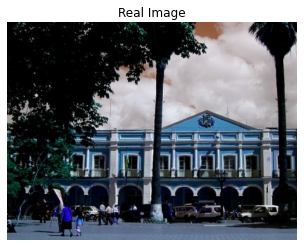

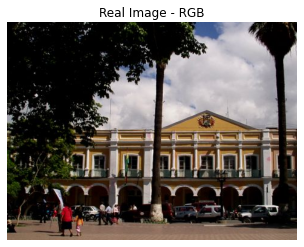

In [68]:
img=cv2.imread(PathColab+"1.jpg", cv2.COLOR_BGR2RGB)
img1= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.axis("off")
plt.title("Real Image")
plt.imshow(img)
pylab.show()
plt.axis("off")
plt.title("Real Image - RGB")
plt.imshow(img1)


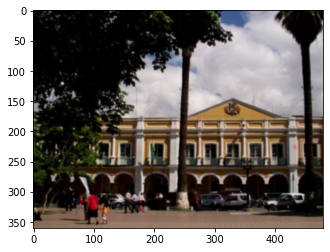

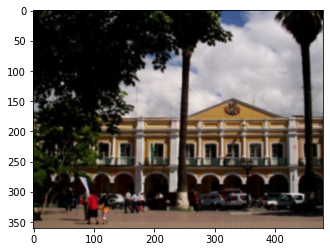

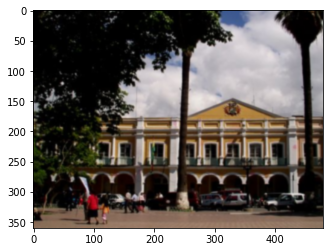

In [71]:
#3x3 filter
fil1=cv2.filter2D(src=img1,ddepth=-3,kernel=val1)
plt.imshow(fil1)
pylab.show()
#5x5 filter
fil2=cv2.filter2D(src=img1,ddepth=-3,kernel=val2)
plt.imshow(fil2)
pylab.show()
#7x7 filter
fil3=cv2.filter2D(src=img1,ddepth=-3,kernel=val3)
plt.imshow(fil3)
pylab.show()

## Question 1. According to the filters you have learnt, which is the best one to remove the salt and pepper noise? Explain it.

**Answer to Q1**: type your answer here

Median Filter is used to remove the salt and noise ,as it smoothens the image and evens out the edges of the iimage after removing the noise

---

## Task 2. Sharpening Filters
2.1 We know a sharp image can be obtained by by subtracting a smoothed (i.e low-passed) image from the original image. Please get a sharp image with the 7 by 7 Gaussian smoothing filter you built in task 1 and display the output.

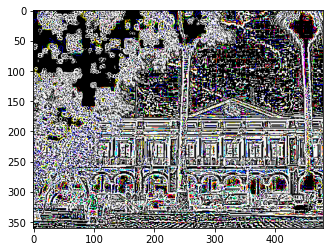

In [ ]:
#write you code here
sharp = img1 - fil3
plt.imshow(sharp)
pylab.show()

2.2 Using the sharp image produced in task 2.1, please apply the unsharp masking and high boost filtering (k = 3) separately, and display the sharpening results.

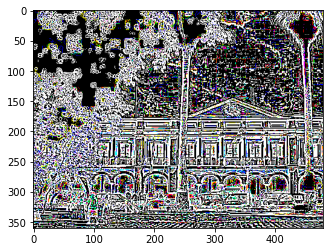

In [66]:
#write your code here
result = unsharp_mask(sharp, radius=5, amount=100)
plt.imshow(result)
pylab.show()


In [62]:
def highBoost(image,boost_factor):
    for i in range(1,image.shape[0]-1):
        for j in range(1,image.shape[1]-1):
            blur_factor = (image[i-1, j-1] + image[i-1, j] - image[i-1, j+1] + image[i, j-1] + image[i, j] + image[i, j+1] + image[i+1, j+1] + image[i+1, j] + image[i+1, j+1])/9
            mask = boost_factor*image[i, j] - blur_factor
            result1[i, j] = image[i, j] + mask
  
    return result1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


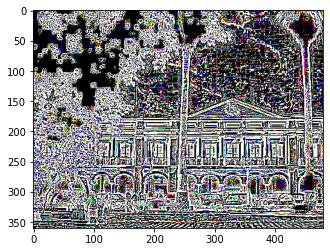

In [65]:
res1=highBoost(result,3)
plt.imshow(res1)
pylab.show()

## Question 2.1 Please give an example of 3 by 3 unsharp masking filter.
For instance, an example of sobel mask filter is: [[-1, -2, -1],[0, 0, 0],[1, 2, 1]].

**Answer to Q2.1**: type your answer here
#Adaptive Unsharp Masking
kernel1 = (1 / 16.0) * np.array([[-1, -2, -1], [-2, 12, -2], [-1, -2, -1]])

## Question 2.2 Explain the difference between sharpening filter (high-pass) and unsharp masking filter
Given a 3 by 3 sharpening filter as [[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]].

**Answer to Q2.2**: type your answer here

A fuzzy (unsharp) version of the image is blended with the original in the unsharp filter to create a sharper image. High-pass filters let high-frequency information through while blocking low-frequency information. It results in center gray areas, lighter and darker areas at the high-frequency boundaries of a copied layer. The crispness of the original is applied by changing the blend mode of this layer to Overlay or Soft Light. The light side is lightened and the dark side is darkened in the unsharp mask, increasing the contrast around the edges.

---